# Machine Learning

## Linear Regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import confusion_matrix,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [15]:
songs = pd.read_csv('data_updated.csv')
songs.columns

Index(['Unnamed: 0', 'id', 'artists', 'year', 'release_date', 'duration_ms',
       'key', 'mode', 'tempo', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'name', '#vocab', 'avg_word_len', 'uniqueness', 'language', 'comm',
       'emotion', 'negative', 'anticipation', 'anger', 'disgust', 'fear',
       'joy', 'positive', 'sadness', 'surprise', 'trust', 'popularity'],
      dtype='object')

In [16]:
del songs['Unnamed: 0']
del songs['id']
del songs['release_date']
del songs['artists']
del songs['name']
del songs['emotion']
songs['language'] = np.where(songs['language']=='English',1,0)
songs['duration_ms'] = songs['duration_ms']/60000
songs['popularity'] = np.where(songs['popularity']>=33, 1, 0)

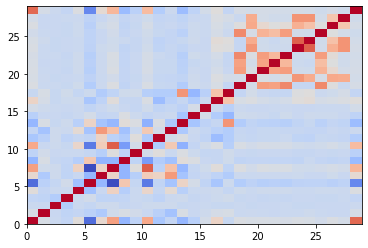

In [17]:
plt.pcolor(songs.corr(), cmap='coolwarm')
plt.show()

In [18]:
import numpy as np
import statsmodels.api as sm
X = songs.iloc[0:,0:28]
X = sm.add_constant(X)
y = songs['popularity']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     8124.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:42:25   Log-Likelihood:                -51490.
No. Observations:              170653   AIC:                         1.030e+05
Df Residuals:                  170624   BIC:                         1.033e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -26.4011      0.089  

### Binary classification: high popularity vs low popularity

In [19]:
def get_classification(predictions, threshod):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] < threshod:
            classes[i] = 0
        else:
            classes[i] = 1
    return classes

def c_m_analysis(true, pred, threshold):
    tn, fp, fn, tp = confusion_matrix(true, get_classification(pred, threshold)).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy: ', accuracy)

In [20]:
train, test = train_test_split(songs, test_size = 0.3, random_state=0) 
model = linear_model.LinearRegression()

# all variables
x_train_1 = train.iloc[0:,0:28]
y_train = train['popularity']
x_test_1 = test.iloc[0:,0:28]
y_test = test['popularity']

model.fit(x_train_1, y_train)
print('Feature set 1: All variables ')
print("Training R-Square: ", model.score(x_train_1,y_train))
print("Testing R-Square: ", model.score(x_test_1,y_test))

testing_predictions_1  = model.predict(x_test_1)

print(c_m_analysis(y_test, testing_predictions_1, 0.5))
print('RMSE: ',mean_squared_error(y_test, testing_predictions_1, squared=False))
print();print()

# facts + text mining
x_train_2 = train[['year','duration_ms','key','mode','tempo','#vocab','avg_word_len','uniqueness','language','comm','negative','anticipation','anger','disgust','fear','joy','positive','sadness','surprise','trust']]
x_test_2 = test[['year','duration_ms','key','mode','tempo','#vocab','avg_word_len','uniqueness','language','comm','negative','anticipation','anger','disgust','fear','joy','positive','sadness','surprise','trust']]
model.fit(x_train_2, y_train)

print('Feature set 2: facts + text mining')
print("Training R-Square: ", model.score(x_train_2,y_train))
print("Testing R-Square: ", model.score(x_test_2,y_test))

testing_predictions_2 = model.predict(x_test_2)

print(c_m_analysis(y_test, testing_predictions_2, 0.5))
print('RMSE: ',mean_squared_error(y_test, testing_predictions_2, squared=False))
print();print()

# only facts
x_train_3 = train[['year','duration_ms','key','mode','tempo']]
x_test_3 = test[['year','duration_ms','key', 'mode','tempo']]

model.fit(x_train_3, y_train)
print('Feature set 3: only facts')
print("Training R-Square: ", model.score(x_train_3,y_train))
print("Testing R-Square: ", model.score(x_test_3,y_test))

testing_predictions_3 = model.predict(x_test_3)

print(c_m_analysis(y_test, testing_predictions_3, 0.5))
print('RMSE: ',mean_squared_error(y_test, testing_predictions_3, squared=False))
print('Linear_acc: ', model.score(x_test_3, np.array(y_test)))

Feature set 1: All variables 
Training R-Square:  0.5695209479307829
Testing R-Square:  0.575683386554231
Accuracy:  0.8544222204859755
None
RMSE:  0.3254577108823647


Feature set 2: facts + text mining
Training R-Square:  0.5649964519339209
Testing R-Square:  0.5714816477186171
Accuracy:  0.8522540823501836
None
RMSE:  0.3270651421914429


Feature set 3: only facts
Training R-Square:  0.5626477352337129
Testing R-Square:  0.569357026311765
Accuracy:  0.8511602468942886
None
RMSE:  0.32787494461965394
Linear_acc:  0.569357026311765


## Logistic Regression

In [21]:
def c_m_analysis(true, pred):
    tn, fp, fn, tp = confusion_matrix(true, pred).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print('Accuracy: ', accuracy)

In [22]:
from sklearn.preprocessing import StandardScaler
model = linear_model.LogisticRegression()

x = songs.iloc[0:,0:28]
y = songs['popularity']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(StandardScaler().fit_transform(x),
                                                            y, test_size=0.3, random_state=0)
model.fit(x_train_1, y_train_1)
print('Feature set 1: All variables ')
print("Training R-Square: ", model.score(x_train_1,y_train_1))
print("Testing R-Square (Logistic_acc): ", model.score(x_test_1,y_test_1))

testing_predictions_1  = model.predict(x_test_1)

print('RMSE: ', mean_squared_error(y_test_1, testing_predictions_1, squared=False))
print(c_m_analysis(y_test_1, testing_predictions_1))
print();print()

# facts + text mining
x = songs[['year','duration_ms','key','mode','tempo','#vocab','avg_word_len','uniqueness','language','comm','negative','anticipation','anger','disgust','fear','joy','positive','sadness','surprise','trust']]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(StandardScaler().fit_transform(x), 
                                                            y, test_size=0.3, random_state=0)
model.fit(x_train_2, y_train_2)

print('Feature set 2: facts + text mining')
print("Training R-Square: ", model.score(x_train_2,y_train_2))
print("Testing R-Square (Logistic_acc): ", model.score(x_test_2,y_test_2))

testing_predictions_2 = model.predict(x_test_2)

print('RMSE: ', mean_squared_error(y_test_2, testing_predictions_2, squared=False))
print(c_m_analysis(y_test_2, testing_predictions_2))
print();print()

# only facts
x = songs[['year','duration_ms','key','mode','tempo']]
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(StandardScaler().fit_transform(x),
                                                            y, test_size=0.3, random_state=0)
model.fit(x_train_3, y_train_3)
print('Feature set 3: only facts')
print("Training R-Square: ", model.score(x_train_3,y_train_3))
print("Testing R-Square (Logistic_acc): ", model.score(x_test_3,y_test_3))

testing_predictions_3 = model.predict(x_test_3)

print('RMSE: ', mean_squared_error(y_test_3, testing_predictions_3, squared=False))
print(c_m_analysis(y_test_3, testing_predictions_3))

Feature set 1: All variables 
Training R-Square:  0.8501552860024946
Testing R-Square (Logistic_acc):  0.8521368856941949
RMSE:  0.38452973136781654
Accuracy:  0.8521368856941949
None


Feature set 2: facts + text mining
Training R-Square:  0.8477778614899085
Testing R-Square (Logistic_acc):  0.8515118368622548
RMSE:  0.38534161874594486
Accuracy:  0.8515118368622548
None


Feature set 3: only facts
Training R-Square:  0.8461371037277012
Testing R-Square (Logistic_acc):  0.8505351980623487
RMSE:  0.38660677947709526
Accuracy:  0.8505351980623487
None


# Numerical

In [23]:
songs = pd.read_csv('data_updated.csv')

In [24]:
del songs['Unnamed: 0']
del songs['id']
del songs['release_date']
del songs['artists']
del songs['name']
del songs['emotion']
songs['language'] = np.where(songs['language']=='English',1,0)
songs['duration_ms'] = songs['duration_ms']/60000

In [25]:
train, test = train_test_split(songs, test_size = 0.3, random_state = 0) 

# all variables
x_train_1 = train.iloc[0:,0:28]
y_train = train['popularity']
x_test_1 = test.iloc[0:,0:28]
y_test = test['popularity']

model_1 = linear_model.LinearRegression() 
model_1.fit(x_train_1, y_train)
print('Feature set 1: All variables ')
print("Training R-Square", model_1.score(x_train_1,y_train))
print("Testing R-Square", model_1.score(x_test_1,y_test))

testing_predictions_1  = model_1.predict(x_test_1)

print('RMSE: ', mean_squared_error(y_test, testing_predictions_1, squared=False))
print();print()

# facts + text mining
x_train_2 = train[['year', 'duration_ms', 'key', 'mode', 'tempo','#vocab', 'avg_word_len', 
                 'uniqueness','language', 'comm', 'negative', 'anticipation', 'anger', 
                 'disgust','fear', 'joy', 'positive', 'sadness', 'surprise', 'trust']]
x_test_2 = test[['year', 'duration_ms', 'key', 'mode', 'tempo','#vocab', 'avg_word_len', 
               'uniqueness','language', 'comm', 'negative', 'anticipation', 'anger', 
               'disgust','fear', 'joy', 'positive', 'sadness', 'surprise', 'trust']]

model_2 = linear_model.LinearRegression() 
model_2.fit(x_train_2, y_train)

print('Feature set 2: facts + text mining')
print("Training R-Square", model_2.score(x_train_2,y_train))
print("Testing R-Square", model_2.score(x_test_2,y_test))

testing_predictions_2 = model_2.predict(x_test_2)

print('RMSE: ', mean_squared_error(y_test, testing_predictions_2, squared=False))
print();print()

# only facts
x_train_3 = train[['year', 'duration_ms', 'key', 'mode', 'tempo']]
x_test_3 = test[['year', 'duration_ms', 'key', 'mode', 'tempo']]

model_3 = linear_model.LinearRegression() 
model_3.fit(x_train_3, y_train)
print('Feature set 3: only facts')
print("Training R-Square", model_3.score(x_train_3,y_train))
print("Testing R-Square", model_3.score(x_test_3,y_test))

testing_predictions_3 = model_3.predict(x_test_3)

print('RMSE: ', mean_squared_error(y_test, testing_predictions_3, squared=False))

Feature set 1: All variables 
Training R-Square 0.7530238616441403
Testing R-Square 0.7586898455895417
RMSE:  10.727309606132794


Feature set 2: facts + text mining
Training R-Square 0.7450814987528587
Testing R-Square 0.7512838133609335
RMSE:  10.890681109112752


Feature set 3: only facts
Training R-Square 0.7420383286714591
Testing R-Square 0.7486239450380239
RMSE:  10.948760845056416
